In [129]:
'''from pytube import YouTube

def Download(link):
    youtubeObject = YouTube(link)
    youtubeObject = youtubeObject.streams.get_lowest_resolution()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")


link = input("""https://www.youtube.com/watch?v=wbWRWeVe1XE""")
Download(link)'''

'from pytube import YouTube\n\ndef Download(link):\n    youtubeObject = YouTube(link)\n    youtubeObject = youtubeObject.streams.get_lowest_resolution()\n    try:\n        youtubeObject.download()\n    except:\n        print("An error has occurred")\n    print("Download is completed successfully")\n\n\nlink = input("""https://www.youtube.com/watch?v=wbWRWeVe1XE""")\nDownload(link)'

In [1]:
import cv2
import os

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
from collections import defaultdict
import numpy as np
import torch
import torchvision
from torchvision import transforms
from PIL import Image


/Users/krutikasavani/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device= "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [7]:
'''timestamp = defaultdict(list)
result = []
df_dict=defaultdict(list)
df_dict_stamp=defaultdict(list)
video_path = ['/Users/krutikasavani/Video-search-local/Test/How Green Roofs Can Help Cities  NPR.mp4', '/Users/krutikasavani/Video-search-local/Test/What Does High-Quality Preschool Look Like  NPR Ed.mp4', '/Users/krutikasavani/CS-GY-6613-Assignments/Video_Search_Assignment/Test/Why It’s Usually Hotter In A City  Lets Talk  NPR.mp4']
for vpath in range(len(video_path)):
    cap = cv2.VideoCapture(video_path[vpath])
    fps = round(cap.get(cv2.CAP_PROP_FPS))
    n=0
    frame_id=0
    while True:
        res, frame = cap.read()
        #decreasing the frame rate from 24 frames per second to 1 frame per 2 seconds
        if (0.5*n)%fps==0:
            name = '/Users/krutikasavani/Video-search-local/Frames/' + str(vpath+1) + '-' + str(frame_id+1) + '.jpg'
            df_dict["Frame_id"].append( str(vpath+1) + '-' + str(frame_id+1))
            df_dict["Video_id"].append(vpath+1)
            cv2.imwrite(name, frame)
            #timestamp[str(vpath+1)].append(f"{cap.get(cv2.CAP_PROP_POS_MSEC)/1000:.2f}")
            df_dict["time_stamp"].append(f"{cap.get(cv2.CAP_PROP_POS_MSEC)/1000:.2f}")

            frame_id+=1
        n+=1
        if res==False:
            break
    cap.release()'''

'timestamp = defaultdict(list)\nresult = []\ndf_dict=defaultdict(list)\ndf_dict_stamp=defaultdict(list)\nvideo_path = [\'/Users/krutikasavani/Video-search-local/Test/How Green Roofs Can Help Cities  NPR.mp4\', \'/Users/krutikasavani/Video-search-local/Test/What Does High-Quality Preschool Look Like  NPR Ed.mp4\', \'/Users/krutikasavani/CS-GY-6613-Assignments/Video_Search_Assignment/Test/Why It’s Usually Hotter In A City  Lets Talk  NPR.mp4\']\nfor vpath in range(len(video_path)):\n    cap = cv2.VideoCapture(video_path[vpath])\n    fps = round(cap.get(cv2.CAP_PROP_FPS))\n    n=0\n    frame_id=0\n    while True:\n        res, frame = cap.read()\n        #decreasing the frame rate from 24 frames per second to 1 frame per 2 seconds\n        if (0.5*n)%fps==0:\n            name = \'/Users/krutikasavani/Video-search-local/Frames/\' + str(vpath+1) + \'-\' + str(frame_id+1) + \'.jpg\'\n            df_dict["Frame_id"].append( str(vpath+1) + \'-\' + str(frame_id+1))\n            df_dict["Video_i

### Extract frames from videos and save them as images.
    
Parameters:
video_path (list): A list of video file paths.
    
Returns:
##### df_dict: {'Frame_id', 'Video_id', 'Timestamp'}

 A dictionary containing information about the extracted frames.
The dictionary has the following keys:

-'Frame_id': A list of frame IDs in the format 'video_id-frame_id'

-'Video_id': A list of video IDs

-'time_stamp': A list of timestamps in seconds

In [4]:
def extract_frames(video_path):

    df_dict = defaultdict(list)
    
    for vpath in range(len(video_path)):
        cap = cv2.VideoCapture(video_path[vpath])
        #fps given the default frame rate (i.e. 24 frames per second)
        fps = round(cap.get(cv2.CAP_PROP_FPS))
        n = 0
        frame_id = 0
        
        while True:
            res, frame = cap.read()
            
            # Decreasing the frame rate from 24 frames per second to 1 frame per 2 seconds
            if (0.5 * n) % fps == 0:
                name = '/Users/krutikasavani/Video-search-local/Test/Frames/' + str(vpath + 1) + '-' + str(frame_id + 1) + '.jpg'
                df_dict["Frame_id"].append(str(vpath + 1) + '-' + str(frame_id + 1))
                df_dict["Video_id"].append(vpath + 1)
                cv2.imwrite(name, frame)
                df_dict["time_stamp"].append(f"{cap.get(cv2.CAP_PROP_POS_MSEC) / 1000:.2f}")
                frame_id += 1
            
            n += 1
            if res == False:
                break
        
        cap.release()
    
    return df_dict


In [5]:
video_path = ['/Users/krutikasavani/Video-search-local/Test/How Green Roofs Can Help Cities  NPR.mp4', '/Users/krutikasavani/Video-search-local/Test/What Does High-Quality Preschool Look Like  NPR Ed.mp4', '/Users/krutikasavani/Video-search-local/Test/Why It’s Usually Hotter In A City  Lets Talk  NPR.mp4']
df_dict = extract_frames(video_path)

In [6]:
df1 = pd.DataFrame(df_dict)
df1.head()

,Frame_id,Video_id,time_stamp
0,1-1,1,0.00
1,1-2,1,2.00
2,1-3,1,4.00
3,1-4,1,6.01
4,1-5,1,8.01


#### Resizing the frames to 800x800 pixels which is required input size for the chosen pre-trained model for detection

In [7]:
transform_frames = transforms.Compose([
    transforms.Resize((800,800)),
    transforms.ToTensor()])

In [8]:
#Defining the labels from ms coco dataset
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

##### Using the fasterrcnn_resnet50_fpn pretrained model for object detection: https://pytorch.org/vision/main/models/faster_rcnn.html

In [9]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()

/Users/krutikasavani/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/krutikasavani/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### The function test_img_identification takes an (img_path) and a (threshold) as input parameters to test the performance of the detector on a single image

Image from the PIL module: Used to open the image file.

cv2: Used for image processing and drawing boxes and text on the image.

The function returns the predictions in form of detected_class_id, Detected_class_labels, Confidence scores, Bbox_coordinates etc.

The function visualizes the object detection results on the input image by drawing bounding boxes and labels around the detected objects above a certain confidence threshold.

In [10]:
def test_img_identification(img_path,threshold):
    img= Image.open(img_path)
    transform_img= transform_frames(img)
    unsq_img= transform_img.unsqueeze(0)

    pred= model(unsq_img)
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]

    img_cv2 = cv2.imread(img_path) 
    img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) 
    img_cv2= cv2.resize(img_cv2, (800, 800))
    text_size=3
    rect_th=3
    text_th=3
    for i in range(len(pred_boxes)): 
        cv2.rectangle(img_cv2, (round(pred_boxes[i][0][0]), round(pred_boxes[i][0][1])), (round(pred_boxes[i][1][0]), round(pred_boxes[i][1][1])),
                      color=(0, 255, 0), thickness=rect_th)
        cv2.putText(img_cv2, pred_class[i], (round(pred_boxes[i][0][0]), round(pred_boxes[i][0][1])), cv2.FONT_HERSHEY_SIMPLEX,
                    text_size, (0, 255, 0), thickness=text_th) 
    plt.figure(figsize=(10,5)) 
    plt.imshow(img_cv2) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.show()
    return pred

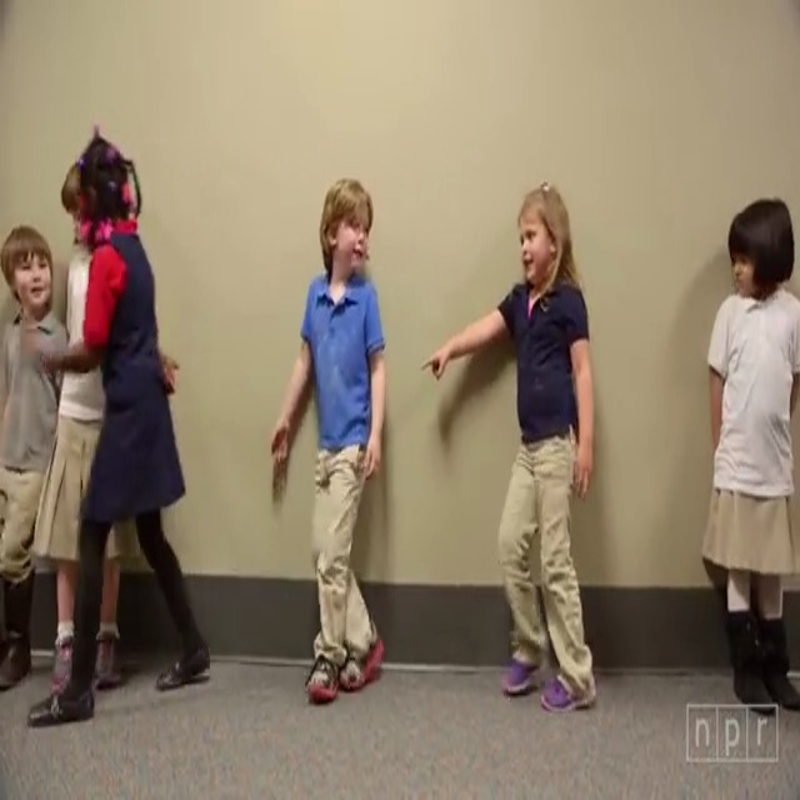

In [11]:
img = Image.open("/Users/krutikasavani/Video-search-local/Test/Frames/2-18.jpg").resize((800,800))
img

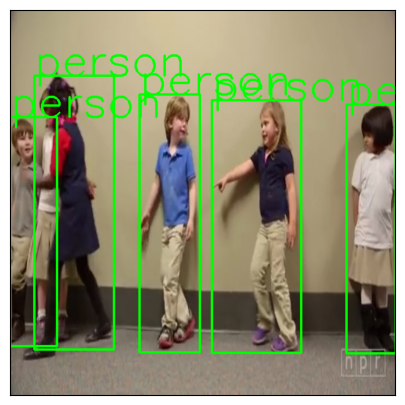

In [12]:
prediction= test_img_identification("/Users/krutikasavani/Video-search-local/Test/Frames/2-18.jpg",threshold=0.85)

In [13]:
prediction

[{'boxes': tensor([[418.0964, 187.0841, 602.9758, 712.0850],
          [267.9216, 175.3681, 393.3038, 710.6351],
          [696.7141, 195.9734, 798.8910, 713.0826],
          [ 50.1285, 135.5934, 215.0379, 705.1334],
          [  0.0000, 222.0823,  97.4912, 697.8539]], grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 1, 1, 1]),
  'scores': tensor([0.9998, 0.9989, 0.9982, 0.9980, 0.9899], grad_fn=<IndexBackward0>)}]

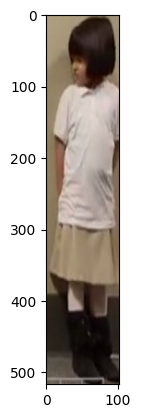

In [15]:
#Crop the object from the test image

crop_box =[696.7141, 195.9734, 798.8910, 713.0826]
img_crop = img.crop(crop_box)
np.array(img_crop).shape
plt.imshow(np.array(img_crop));

In [16]:
# detecting objects in the frames and saving the results in a dictionary df_dict2

def predict_objects(path):
    df_dict2 = defaultdict(list)
    files = sorted(os.listdir(path))
    
    for f in files:
        file_name = path + f
        print(file_name)
        img = Image.open(file_name)
        img_transform = transform_frames(img)
        unsq_img = img_transform.unsqueeze(0)
        pred = model(unsq_img)
        print("object detected")

        pred_class = [COCO_INSTANCE_CATEGORY_NAMES[j] for j in pred[0]['labels'].numpy().tolist()]
        pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
        pred_score = list(pred[0]['scores'].detach().numpy())

        df_dict2["Frame_id"].append(f.split(".jpg")[0])
        
        if len(pred_score) >= 1:
            threshold = 0.85
            pred_t = [pred_score.index(x) for x in pred_score if x > threshold]
            
            if len(pred_t) >= 1:
                pred_boxes_thresh = pred_boxes[:pred_t[-1] + 1]
                pred_class_thresh = pred_class[:pred_t[-1] + 1]
                pred_score_thresh = pred_score[:pred_t[-1] + 1]
                
                df_dict2["Detected_Object_ID"].append([COCO_INSTANCE_CATEGORY_NAMES.index(i) for i in pred_class_thresh])
                df_dict2["Detected_Object_Class"].append(pred_class_thresh)
                df_dict2["Number_of_objects_detected"].append(len(pred_class_thresh))
                df_dict2["Confidence_Score"].append(pred_score_thresh)
                df_dict2["BBox_Coordinates"].append(pred_boxes_thresh)
                print("dict updated")
            else:
                df_dict2["Detected_Object_ID"].append("NaN")
                df_dict2["Detected_Object_Class"].append("NaN")
                df_dict2["Number_of_objects_detected"].append("NaN")
                df_dict2["Confidence_Score"].append("NaN")
                df_dict2["BBox_Coordinates"].append("NaN")
                print("dict updated")
        else:
            df_dict2["Detected_Object_ID"].append("NaN")
            df_dict2["Detected_Object_Class"].append("NaN")
            df_dict2["Number_of_objects_detected"].append("NaN")
            df_dict2["Confidence_Score"].append("NaN")
            df_dict2["BBox_Coordinates"].append("NaN")
            print("dict updated")
    
    return df_dict2

In [17]:
df_dict2= predict_objects('/Users/krutikasavani/Video-search-local/Test/Frames/')

/Users/krutikasavani/Video-search-local/Test/Frames/1-1.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-10.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-100.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-101.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-102.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-103.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-104.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-105.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-106.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-107.jpg
object detected
dict updated
/Users/krutikasavani/Video-search-local/Test/Frames/1-108.jpg
object detected
dict updated
/U

In [18]:
for key in df_dict2.keys():
    print(key, len(df_dict2[key]))

Frame_id 361
Detected_Object_ID 361
Detected_Object_Class 361
Number_of_objects_detected 361
Confidence_Score 361
BBox_Coordinates 361


In [19]:
#Creating a dataframe df2 from the dictionary df_dict2

df2 = pd.DataFrame(df_dict2)
df2.head()

,Frame_id,Detected_Object_ID,Detected_Object_Class,Number_of_objects_detected,Confidence_Score,BBox_Coordinates
0,1-1,NaN,NaN,NaN,NaN,NaN
1,1-10,"[8, 1]","[truck, person]",2,"[0.93288654, 0.85835296]","[[(202.43698, 527.23755), (369.06277, 647.9072..."
2,1-100,NaN,NaN,NaN,NaN,NaN
3,1-101,NaN,NaN,NaN,NaN,NaN
4,1-102,NaN,NaN,NaN,NaN,NaN


In [20]:
#Merging the dataframes df1 and df2 on the column Frame_id

final_df = pd.merge(pd.DataFrame(df1), pd.DataFrame(df2), on='Frame_id')
final_df.head(10)

,Frame_id,Video_id,time_stamp,Detected_Object_ID,Detected_Object_Class,Number_of_objects_detected,Confidence_Score,BBox_Coordinates
0,1-1,1,0.00,NaN,NaN,NaN,NaN,NaN
1,1-2,1,2.00,NaN,NaN,NaN,NaN,NaN
2,1-3,1,4.00,NaN,NaN,NaN,NaN,NaN
3,1-4,1,6.01,"[1, 1, 1, 1, 27, 1]","[person, person, person, person, backpack, per...",6,"[0.9930999, 0.9813774, 0.9701847, 0.96127826, ...","[[(511.83377, 520.6686), (685.1189, 795.6615)]..."
4,1-5,1,8.01,NaN,NaN,NaN,NaN,NaN
5,1-6,1,10.01,NaN,NaN,NaN,NaN,NaN
6,1-7,1,12.01,NaN,NaN,NaN,NaN,NaN
7,1-8,1,14.01,NaN,NaN,NaN,NaN,NaN
8,1-9,1,16.02,"[8, 10, 1]","[truck, traffic light, person]",3,"[0.93716687, 0.9086209, 0.88539094]","[[(209.85597, 529.3398), (372.12482, 641.56305..."
9,1-10,1,18.02,"[8, 1]","[truck, person]",2,"[0.93288654, 0.85835296]","[[(202.43698, 527.23755), (369.06277, 647.9072..."


In [21]:
#Dropping the NaN values

final_df = final_df.drop(final_df[final_df['Detected_Object_ID'] == 'NaN'].index)

In [22]:
len(final_df)

202

In [23]:
final_df.head(5)

,Frame_id,Video_id,time_stamp,Detected_Object_ID,Detected_Object_Class,Number_of_objects_detected,Confidence_Score,BBox_Coordinates
3,1-4,1,6.01,"[1, 1, 1, 1, 27, 1]","[person, person, person, person, backpack, per...",6,"[0.9930999, 0.9813774, 0.9701847, 0.96127826, ...","[[(511.83377, 520.6686), (685.1189, 795.6615)]..."
8,1-9,1,16.02,"[8, 10, 1]","[truck, traffic light, person]",3,"[0.93716687, 0.9086209, 0.88539094]","[[(209.85597, 529.3398), (372.12482, 641.56305..."
9,1-10,1,18.02,"[8, 1]","[truck, person]",2,"[0.93288654, 0.85835296]","[[(202.43698, 527.23755), (369.06277, 647.9072..."
13,1-14,1,26.03,[1],[person],1,[0.9993074],"[[(0.0, 114.42975), (494.42712, 792.2802)]]"
14,1-15,1,28.03,[1],[person],1,[0.9994116],"[[(0.0, 114.10135), (491.352, 789.7283)]]"


In [25]:
#Dropping 3 frames with incorrect detections - checked manually where frames had only one object detected

final_df = final_df.drop(final_df[final_df['Frame_id'] == '2-77'].index)
final_df = final_df.drop(final_df[final_df['Frame_id'] == '1-105'].index)
final_df = final_df.drop(final_df[final_df['Frame_id'] == '1-42'].index)

In [26]:
# Saving the final dataframe to a json file

final_df.to_json("detection_data_local1.json")

In [27]:
from typing import List
detected_df = pd.read_json('detection_data_local1.json')
detected_df=detected_df.reset_index()
detected_df = detected_df.drop(["index"],axis=1)
detected_df.head(5)

,Frame_id,Video_id,time_stamp,Detected_Object_ID,Detected_Object_Class,Number_of_objects_detected,Confidence_Score,BBox_Coordinates
0,1-4,1,6.01,"[1, 1, 1, 1, 27, 1]","[person, person, person, person, backpack, per...",6,"[0.9930999279, 0.9813774228000001, 0.970184683...","[[[511.833770752, 520.6685791016], [685.118896..."
1,1-9,1,16.02,"[8, 10, 1]","[truck, traffic light, person]",3,"[0.9371668696000001, 0.908620894, 0.8853909373...","[[[209.85597229, 529.3397827148], [372.1248168..."
2,1-10,1,18.02,"[8, 1]","[truck, person]",2,"[0.9328865409, 0.8583529592]","[[[202.4369812012, 527.2375488281], [369.06277..."
3,1-14,1,26.03,[1],[person],1,[0.999307394],"[[[0.0, 114.4297485352], [494.4271240234, 792...."
4,1-15,1,28.03,[1],[person],1,[0.9994115829],"[[[0.0, 114.101348877], [491.3519897461, 789.7..."


In [28]:
#Cropping the objects from all the extracted frames - only taking object images of size greater than 100x100

objects_path= "cropped_test_objects/"
frames_path= "/Users/krutikasavani/Video-search-local/Test/Frames/"

df_dict3 = defaultdict(list)

for idx,i in enumerate(detected_df["Frame_id"]):
    img= Image.open(frames_path + i +".jpg").resize((800,800))

    for j in range(len(detected_df.iloc[idx,:]["BBox_Coordinates"])):
        bbox_cords= detected_df.iloc[idx,:]["BBox_Coordinates"][j]
        boxes = (bbox_cords[0][0],bbox_cords[0][1],bbox_cords[1][0],bbox_cords[1][1])
        img_crop= img.crop(boxes)
        if img_crop.size[0]>100 and img_crop.size[1]>100:
            img_crop.save(objects_path +f"{i}-{j+1}.jpg")

            df_dict3["Video_ID"].append(i.split("-")[0])
            df_dict3["Frame_ID"].append(i)
            df_dict3["Time_Stamp"].append(detected_df.iloc[idx,:]["time_stamp"][j])
            df_dict3["Object_file_name"].append(f"{i}-{j+1}")
            df_dict3["Object_ID"].append(detected_df.iloc[idx,:]["Detected_Object_ID"][j])
            df_dict3["Class"].append(detected_df.iloc[idx,:]["Detected_Object_Class"][j])
            df_dict3["Confidence_Score"].append(detected_df.iloc[idx,:]["Confidence_Score"][j])
            df_dict3["Bbox_Info"].append((bbox_cords[0][0],bbox_cords[0][1],bbox_cords[1][0],bbox_cords[1][1]))

In [29]:
objects_df= pd.DataFrame(df_dict3)
objects_df

,Video_ID,Frame_ID,Object_file_name,Object_ID,Class,Confidence_Score,Bbox_Info
0,1,1-4,1-4-1,1,person,0.993100,"(511.833770752, 520.6685791016, 685.1188964844..."
1,1,1-4,1-4-5,27,backpack,0.923961,"(517.72265625, 657.7026977539, 658.6451416016,..."
2,1,1-9,1-9-1,8,truck,0.937167,"(209.85597229, 529.3397827148, 372.1248168945,..."
3,1,1-9,1-9-2,10,traffic light,0.908621,"(686.7906494141, 339.068145752, 796.0911865234..."
4,1,1-10,1-10-1,8,truck,0.932887,"(202.4369812012, 527.2375488281, 369.062774658..."
...,...,...,...,...,...,...,...
506,3,3-24,3-24-1,3,car,0.998293,"(5.3004455566, 288.9576416016, 315.8401794434,..."
507,3,3-24,3-24-2,3,car,0.997848,"(207.9128570557, 280.753692627, 347.0368041992..."
508,3,3-27,3-27-1,3,car,0.941207,"(1.3242645264, 370.0650024414, 277.9096069336,..."
509,3,3-53,3-53-1,77,cell phone,0.958602,"(202.8564605713, 127.6772460938, 708.384094238..."


In [34]:
#Names of the unique classes detected

unique_det_classes=[]
for k in objects_df['Class']:
    unique_det_classes.append(k)
unique_det_classes

['person',
 'backpack',
 'truck',
 'traffic light',
 'truck',
 'person',
 'person',
 'person',
 'person',
 'person',
 'car',
 'car',
 'car',
 'car',
 'car',
 'person',
 'person',
 'person',
 'person',
 'frisbee',
 'frisbee',
 'frisbee',
 'frisbee',
 'car',
 'car',
 'car',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'chair',
 'person',
 'person',
 'person',
 'person',
 'person',
 'chair',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'p

In [35]:
#Number of objects in each unique class

from collections import Counter

item_counts = Counter(unique_det_classes)
print(item_counts)

Counter({'person': 416, 'car': 18, 'cup': 17, 'dining table': 10, 'chair': 8, 'bowl': 8, 'bottle': 7, 'frisbee': 4, 'potted plant': 4, 'train': 3, 'truck': 2, 'handbag': 2, 'tv': 2, 'donut': 2, 'cell phone': 2, 'backpack': 1, 'traffic light': 1, 'bird': 1, 'cake': 1, 'keyboard': 1, 'umbrella': 1})


In [37]:
#Number of unique detected classes

print(f"Number of unique detected classes: {len(item_counts)}")

Number of unique detected classes: 21


In [38]:
#Checking classes with lowest number of objects detected

print(item_counts.most_common()[::-1])

[('umbrella', 1), ('keyboard', 1), ('cake', 1), ('bird', 1), ('traffic light', 1), ('backpack', 1), ('cell phone', 2), ('donut', 2), ('tv', 2), ('handbag', 2), ('truck', 2), ('train', 3), ('potted plant', 4), ('frisbee', 4), ('bottle', 7), ('bowl', 8), ('chair', 8), ('dining table', 10), ('cup', 17), ('car', 18), ('person', 416)]


In [39]:
#Removing all classes with less than 5 objects detected

unwanted_classes= [i for i,j in item_counts.items() if j<=5]


# Remove rows containing specified classes
filtered_df = objects_df[~objects_df['Class'].isin(unwanted_classes)]

filtered_df

,Video_ID,Frame_ID,Object_file_name,Object_ID,Class,Confidence_Score,Bbox_Info
0,1,1-4,1-4-1,1,person,0.993100,"(511.833770752, 520.6685791016, 685.1188964844..."
5,1,1-14,1-14-1,1,person,0.999307,"(0.0, 114.4297485352, 494.4271240234, 792.2802..."
6,1,1-15,1-15-1,1,person,0.999412,"(0.0, 114.101348877, 491.3519897461, 789.72827..."
7,1,1-17,1-17-1,1,person,0.999388,"(3.8283996582, 134.8305969238, 515.2060546875,..."
8,1,1-28,1-28-1,1,person,0.999278,"(5.7371826172, 129.1081542969, 519.1452636719,..."
...,...,...,...,...,...,...,...
504,3,3-23,3-23-2,3,car,0.996828,"(196.6315612793, 283.0484924316, 342.737030029..."
505,3,3-23,3-23-3,3,car,0.996609,"(335.6121520996, 301.2465820312, 512.008850097..."
506,3,3-24,3-24-1,3,car,0.998293,"(5.3004455566, 288.9576416016, 315.8401794434,..."
507,3,3-24,3-24-2,3,car,0.997848,"(207.9128570557, 280.753692627, 347.0368041992..."


In [40]:
filtered_df.to_json("objects_df.json")

In [41]:
#Final classes to keep

filtered_df_item_counts = Counter(filtered_df['Class'])
print(filtered_df_item_counts)

Counter({'person': 416, 'car': 18, 'cup': 17, 'dining table': 10, 'chair': 8, 'bowl': 8, 'bottle': 7})
